In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
#兖洲煤业 600188
get_industry("000002.XSHE", date=None)

{'000002.XSHE': {'sw_l1': {'industry_code': '801180', 'industry_name': '房地产I'},
  'sw_l2': {'industry_code': '801181', 'industry_name': '房地产开发II'},
  'sw_l3': {'industry_code': '851811', 'industry_name': '房地产开发III'},
  'zjw': {'industry_code': 'K70', 'industry_name': '房地产业'},
  'jq_l2': {'industry_code': 'HY509', 'industry_name': '房地产开发指数'},
  'jq_l1': {'industry_code': 'HY011', 'industry_name': '房地产指数'}}}

In [3]:
# 煤炭行业的成分股
sw_id='801180'
stocks = get_industry_stocks(sw_id)
print(stocks)

['000002.XSHE', '000006.XSHE', '000011.XSHE', '000014.XSHE', '000029.XSHE', '000031.XSHE', '000036.XSHE', '000042.XSHE', '000046.XSHE', '000056.XSHE', '000069.XSHE', '000090.XSHE', '000402.XSHE', '000502.XSHE', '000506.XSHE', '000514.XSHE', '000517.XSHE', '000537.XSHE', '000540.XSHE', '000558.XSHE', '000560.XSHE', '000573.XSHE', '000608.XSHE', '000609.XSHE', '000615.XSHE', '000616.XSHE', '000620.XSHE', '000631.XSHE', '000656.XSHE', '000667.XSHE', '000668.XSHE', '000671.XSHE', '000679.XSHE', '000691.XSHE', '000718.XSHE', '000732.XSHE', '000736.XSHE', '000797.XSHE', '000809.XSHE', '000838.XSHE', '000863.XSHE', '000897.XSHE', '000909.XSHE', '000918.XSHE', '000926.XSHE', '000961.XSHE', '000965.XSHE', '000981.XSHE', '001914.XSHE', '001979.XSHE', '002016.XSHE', '002133.XSHE', '002146.XSHE', '002147.XSHE', '002208.XSHE', '002244.XSHE', '002285.XSHE', '002305.XSHE', '002314.XSHE', '002377.XSHE', '002968.XSHE', '600007.XSHG', '600048.XSHG', '600064.XSHG', '600067.XSHG', '600077.XSHG', '600082.X

In [4]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [5]:
# 获取一支股票
start_date="2020-08-22"
end_date="2020-11-06"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")

load data


ValueError: x and y must have same first dimension, but have shapes (49,) and (48,)

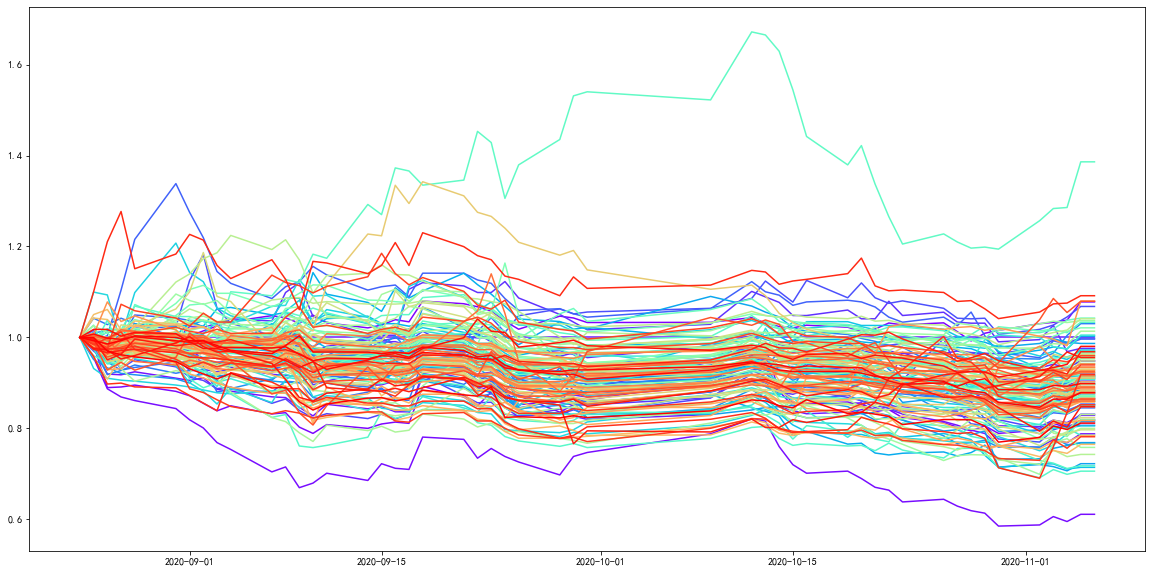

In [6]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == sw_id,
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [7]:
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


0.9319834886866927
              name    return
002285.XSHE    世联行  1.386161
600823.XSHG   世茂股份  1.091727
600648.XSHG    外高桥  1.079774
600732.XSHG   爱旭股份  1.079507
000002.XSHE    万科A  1.078142
000502.XSHE   绿景控股  1.068120
002377.XSHE   国创高新  1.042453
600266.XSHG   城建发展  1.041145
600177.XSHG    雅戈尔  1.037037
002244.XSHE   滨江集团  1.033403
000608.XSHE   阳光股份  1.030303
600067.XSHG   冠城大通  1.021108
600215.XSHG  *ST经开  1.013672
000981.XSHE  *ST银亿  1.005128
000671.XSHE    阳光城  1.002797
000029.XSHE   深深房A  1.000000
000402.XSHE    金融街  0.998555
000517.XSHE   荣安地产  0.996283
000667.XSHE   美好置业  0.986737
601155.XSHG   新城控股  0.980343
000046.XSHE   泛海控股  0.975904
000736.XSHE   中交地产  0.972299
000838.XSHE   财信发展  0.969388
600223.XSHG   鲁商发展  0.969023
600848.XSHG   上海临港  0.968580
002133.XSHE   广宇集团  0.966565
600048.XSHG   保利地产  0.966019
600393.XSHG   粤泰股份  0.962963
600743.XSHG   华远地产  0.959821
600159.XSHG   大龙地产  0.958801
600890.XSHG   中房股份  0.955720
600208.XSHG   新湖中宝  0.952802
000042.XSHE   中洲控股  0.94

In [ ]:
#print(df_dict["002110.XSHE"])
